# House Pricing

### Latar Belakang
pada final project ini, akan dilakukan pembuatan model yang dapat memberikan prediksi yang baik tentang harga rumah berdasarkan variable lain dengan menggunakan dataset yang berisi informasi tentang lokasi rumah, harga dan aspek lainnya.
pada permodelan ini, prediksi yang akan dimodelkan harus lah memiliki skor akurasi sebesar >= 85%.

In [3]:
# import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline

In [8]:
# import dataset and read dataset
data_house = pd.read_csv("kc_house_data.csv")
data_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Mengetahui tentang dataset
data_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


dari data yang kita dapat, menunjukan bahwa dataset tersebut memiliki informasi rumah dengan 33 kamar tidur yang menunjukan bahwa rumah tersebut tampak besar dan memiliki daya tarik terhadap informasi yang dapat digali lebih dalam. selain itu, dataset memiliki informasi maksimum luas presegi bagian dalam dengan luas 13450 m2 dan minimum 290 m2 yang menunjukan bahwa data terdistribusi.

- Rumah mana yang paling laku/memiliki daya minat yang tinggi ?

bagi developer, penting bagi mereka melihat tipe rumah dengan penjualan tertinggi guna meningkatkan pendapatan bagi developer rumah tersebut.


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

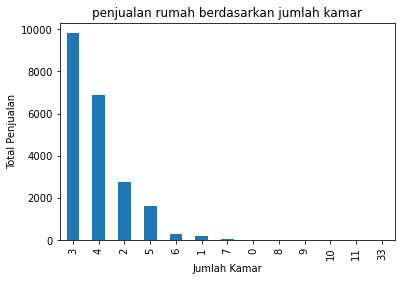

In [16]:
data_house['bedrooms'].value_counts().plot(kind='bar')
plt.title('penjualan rumah berdasarkan jumlah kamar')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Total Penjualan')
sns.despine



dapat dilihat bahwa rumah dengan 3 kamar tidur menjadi type rumah dengan peminat terbanyak dan diikuti dengan tipe dengan 4 kamar tidur. jika developer rumah memiliki data ini, maka ia akan lebih banyak membuat rumah dengan tipa dengan 3 kamar tidur dan tipe dengan 4 kamar tidur.

- bagaimana dengan lokasi pembangunan yang ideal ?

C:\Users\20210257\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

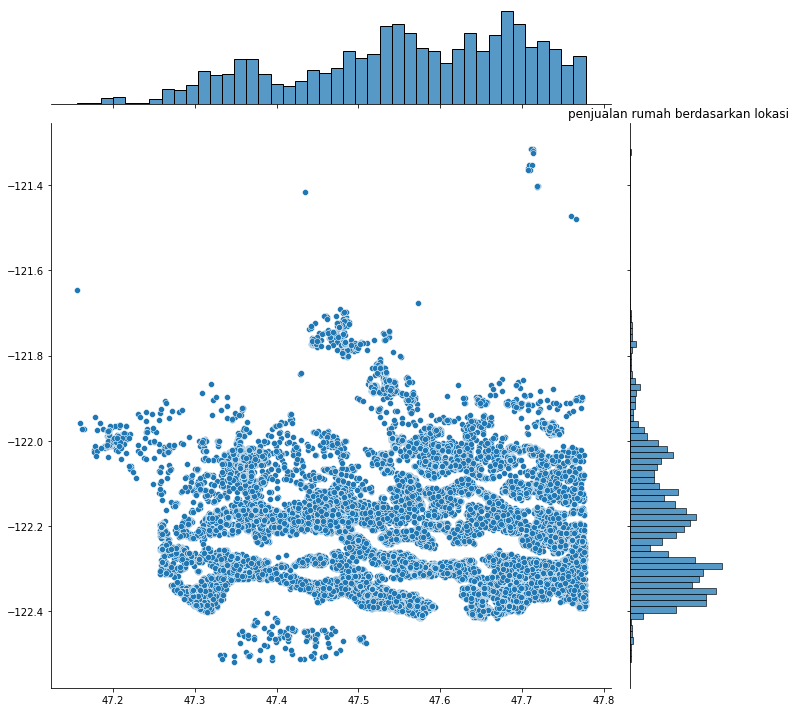

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [18]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data_house.lat.values, y=data_house.long.values, size=10)
plt.title('penjualan rumah berdasarkan lokasi')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

dapat dilihat bahwa dari garis lintang -47.7 hingga -48.8 dan rentang garis bujur -122.2 hingga -122.4 menjadi lokasi pembelian terbesar. dalam hal ini, developer akan melihat lokasi ini sebagai lokasi yang ideal untuk pembangunan

- lalu, bagaimana harga rumah rumah tersebut ditentukan ? saya akan memulai dengan, jika harga dipengaruhi oleh ruang tamu atau tidak?

Text(0.5, 1.0, 'Harga x Ruang Tamu')

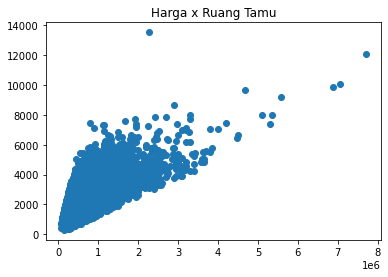

In [20]:
plt.scatter(data_house.price,data_house.sqft_living)
plt.title("Harga x Ruang Tamu")

Text(0.5, 1.0, 'Harga vs Lokasi')

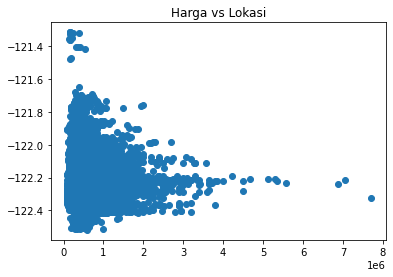

In [21]:
plt.scatter(data_house.price,data_house.long)
plt.title("Harga vs Lokasi")

pada gambar pertama melalui scatter plot, menunjukan semakin banyak ruang tamu, maka harga jual juga semakin tinggi. meskipun terdapat data dengan luas ruang tamu terbesar memiliki harga yang tidak demikian (mungkin saja terdapat faktor lain).
selain itu, pada gambar kedua terdapat hal menarik yang dapat simpulkan bahwa pada rentang bujur -122.2 hingga -122.4 menjadi lokasi dengan harga tertinggi

Text(0.5, 1.0, 'Latitude vs Harga')

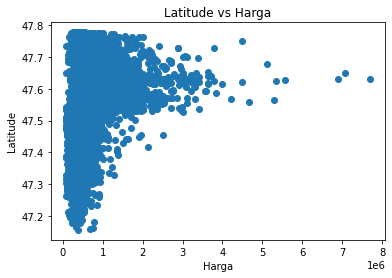

In [22]:
plt.scatter(data_house.price,data_house.lat)
plt.xlabel("Harga")
plt.ylabel('Latitude')
plt.title("Latitude vs Harga")

begitu juga dengan rentang lintang 47.6 hingga 47.7 menjadi lokasi dengan harga tinggi

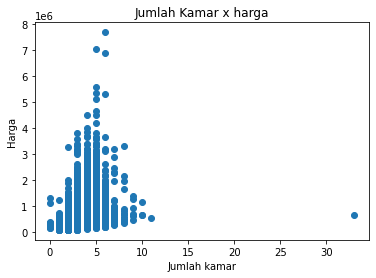

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [23]:
plt.scatter(data_house.bedrooms,data_house.price)
plt.title("Jumlah Kamar x harga")
plt.xlabel("Jumlah kamar")
plt.ylabel("Harga")
plt.show()
sns.despine

selain itu, harga juga dapat ditentukan dengan jumlah kamar. namun jika kita lihat kembali dengan visualisasi diatas, bahwa kamar dengan 3 dan 4 kamar tetap menjadi tipa rumah paling laris

dari beberapa representasi diatas, dapat kita simpulkan bahwa terdapat banyak faktor yang dapat mempengaruhi harga rumah. maka saya akan coba membuat model untuk prediksi harga rumah

## regresi linear

karena kita akan memprediksi harga rumah berdasarkan variable yang ada pada dataset, maka kita gunakan regresi linear

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

### Data Pre Processing

#### Target Engineering

In [91]:
labels = data_house['price']
conv_dates = [1 if values == 2014 else 0 for values in data_house.date ]
data_house['date'] = conv_dates
train1 = data_house.drop(['id', 'price','bathrooms','floors','sqft_above','lat','long'],axis=1)

yang dilakukan diatas adalah kita menentukan label. karena harga akan diprediksi , maka kita menetapkan kolom harga sebagai label (output). selain itu kita juga mengkonversi tanggal menjadi nilai 1 atau 0 agar tidak mempengaruhi banyak data.

### Split data

In [58]:
from sklearn.model_selection import train_test_split

In [62]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

### Train Model

In [63]:
reg.fit(x_train,y_train)

LinearRegression()

In [64]:
reg.score(x_test,y_test)

0.6882251084863036

Setelah memasukkan data model, dapat diperiksa skor data yang didapat adalah prediksi. dalam hal ini prediksinya adalah 68%

skor yang diperoleh tidak memenuhi skor yang telah ditentukan. maka diperlukan peningkatan pada permodelan.
Untuk membangun model prediksi, banyak ahli menggunakan regresi peningkatan gradien. Ini adalah teknik pembelajaran mesin untuk masalah regresi dan klasifikasi, yang menghasilkan model prediksi dalam bentuk ansambel model prediksi yang lemah, biasanya pohon keputusan.



In [92]:
from sklearn import ensemble
# membuat variabel untuk mendefinisikan regressor penambah gradien
params = dict({'n_estimators': 400, 'max_depth' : 5, 'min_samples_split' : 2,'learning_rate' : 0.1, 'loss' : 'ls'})
clf = ensemble.GradientBoostingRegressor(**params)

In [94]:
# train model
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [80]:
clf.score(x_test,y_test)

0.8927060271750659

### Evaluasi model

In [81]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [83]:
y_pred = reg.predict(x_test)

In [84]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [85]:
testsc = np.arange((params['n_estimators']))+1

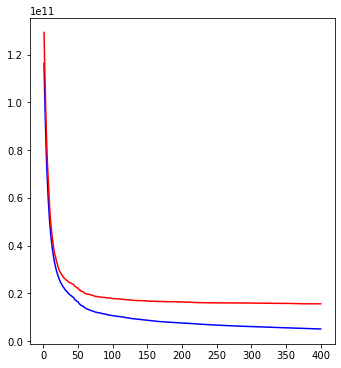

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')